## Name: Prince Shrestha
## Group: L6CG7

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**WORKSHEET 6**

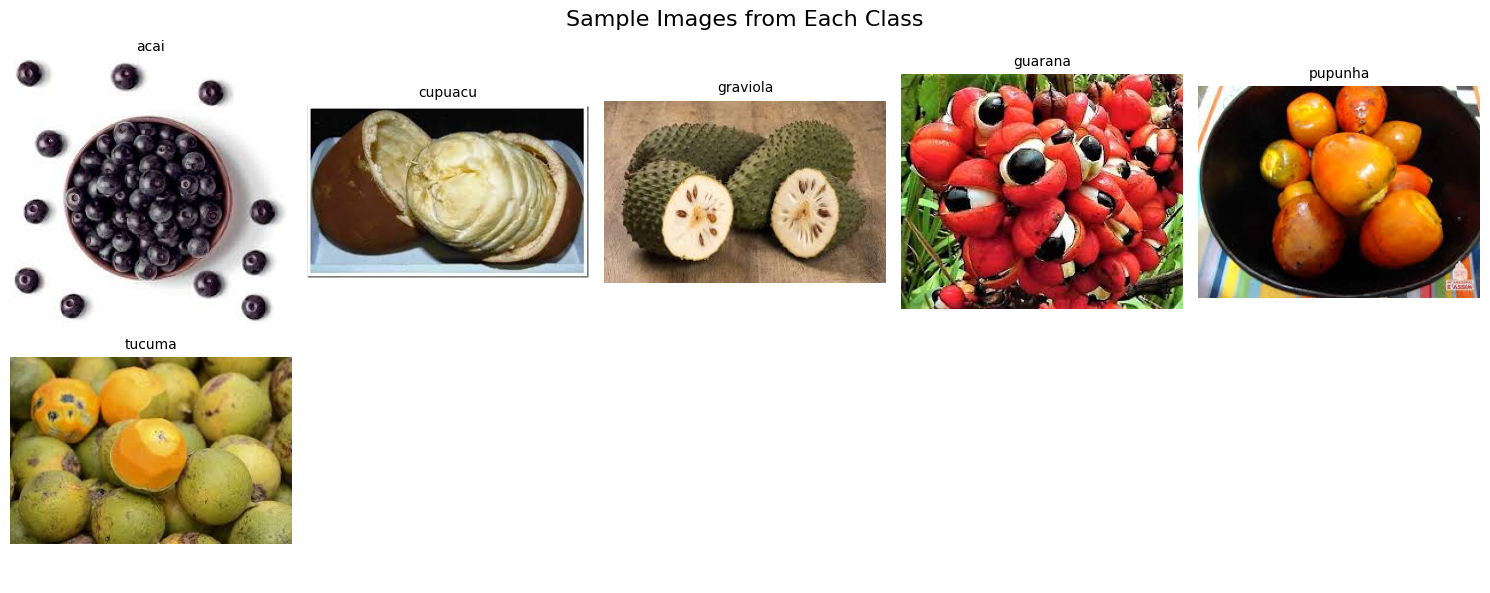

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [3]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [4]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Prince_Shrestha.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.1811 - loss: 2.0799
Epoch 1: val_loss improved from inf to 1.58349, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 598ms/step - accuracy: 0.1740 - loss: 2.1160 - val_accuracy: 0.8333 - val_loss: 1.5835
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.1985 - loss: 1.7763
Epoch 2: val_loss improved from 1.58349 to 1.44430, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step - accuracy: 0.2079 - loss: 1.7723 - val_accuracy: 0.8333 - val_loss: 1.4443
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.4005 - loss: 1.6522
Epoch 3: val_loss did not improve from 1.44430
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 698ms/step - accuracy: 0.3976 - loss: 1.6471 - val_accuracy: 0.0000e+00 - val_loss: 1.8525
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.4433 - loss: 1.5389
Epoch 4: val_loss improved from 1.44430 to 1.32605, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - accuracy: 0.4540 - loss: 1.5305 - val_accuracy: 0.5000 - val_loss: 1.3261
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.5475 - loss: 1.2903
Epoch 5: val_loss improved from 1.32605 to 1.10357, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 453ms/step - accuracy: 0.5634 - loss: 1.2852 - val_accuracy: 0.6667 - val_loss: 1.1036
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6586 - loss: 1.1306
Epoch 6: val_loss did not improve from 1.10357
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 401ms/step - accuracy: 0.6675 - loss: 1.1191 - val_accuracy: 0.6667 - val_loss: 1.1442
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.7101 - loss: 0.8502
Epoch 7: val_loss did not improve from 1.10357
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 507ms/step - accuracy: 0.7096 - loss: 0.8524 - val_accuracy: 0.6667 - val_loss: 1.3346
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.8067 - loss: 0.8512
Epoch 8: val_loss improved from 1.10357 to 0.83566, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 530ms/step - accuracy: 0.7960 - loss: 0.8580 - val_accuracy: 0.7778 - val_loss: 0.8357
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.6817 - loss: 0.9503
Epoch 9: val_loss improved from 0.83566 to 0.69705, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 780ms/step - accuracy: 0.7023 - loss: 0.9160 - val_accuracy: 0.8333 - val_loss: 0.6970
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.9497 - loss: 0.3961
Epoch 10: val_loss did not improve from 0.69705
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 410ms/step - accuracy: 0.9518 - loss: 0.3916 - val_accuracy: 0.7222 - val_loss: 0.8585
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 1.0000 - loss: 0.2488
Epoch 11: val_loss improved from 0.69705 to 0.43983, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 480ms/step - accuracy: 1.0000 - loss: 0.2417 - val_accuracy: 0.8889 - val_loss: 0.4398
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 1.0000 - loss: 0.1611
Epoch 12: val_loss did not improve from 0.43983
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 1.0000 - loss: 0.1574 - val_accuracy: 0.8889 - val_loss: 0.4852
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 1.0000 - loss: 0.0780
Epoch 13: val_loss did not improve from 0.43983
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 417ms/step - accuracy: 1.0000 - loss: 0.0768 - val_accuracy: 0.8889 - val_loss: 0.4591
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 1.0000 - loss: 0.0376
Epoch 14: val_loss did not improve from 0.43983
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 743ms/step - accuracy: 1.0000 - loss: 0.0376 - val_accuracy: 0.8333 - val_loss: 0.4436
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 1.0000 - loss: 0.0278
Epoch 15: val_loss improved from 0.43983 to 0.37079,

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 493ms/step - accuracy: 1.0000 - loss: 0.0273 - val_accuracy: 0.8889 - val_loss: 0.3708
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 1.0000 - loss: 0.0159
Epoch 16: val_loss improved from 0.37079 to 0.36462, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - accuracy: 1.0000 - loss: 0.0158 - val_accuracy: 0.8889 - val_loss: 0.3646
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 1.0000 - loss: 0.0105
Epoch 17: val_loss improved from 0.36462 to 0.36297, saving model to Prince_Shrestha.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 451ms/step - accuracy: 1.0000 - loss: 0.0103 - val_accuracy: 0.8889 - val_loss: 0.3630
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 1.0000 - loss: 0.0057
Epoch 18: val_loss did not improve from 0.36297
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.8889 - val_loss: 0.3675
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 1.0000 - loss: 0.0073
Epoch 19: val_loss did not improve from 0.36297
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 740ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.8889 - val_loss: 0.3969
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 1.0000 - loss: 0.0038
Epoch 20: val_loss did not improve from 0.36297
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 514ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8889 - val_loss: 0.4217
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 1.0000 - loss: 0.0027
Epoch 21: val_loss did not improve from 0.36297
3/3 

In [8]:
test_dir = '/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.6000 - loss: 240.7789
Test Loss: 240.77894592285156
Test Accuracy: 0.6000000238418579


In [9]:

model.save('Prince_Shrestha_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.38      0.60      0.46         5
           2       0.71      1.00      0.83         5
           3       0.75      0.60      0.67         5
           4       1.00      0.40      0.57         5
           5       0.40      0.40      0.40         5

    accuracy                           0.60        30
   macro avg       0.66      0.60      0.60        30
weighted avg       0.66      0.60      0.60        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 1.0000 - loss: 0.0068
Epoch 1: val_loss did not improve from 0.36297
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 434ms/step - accuracy: 1.0000 - loss: 0.0068 - val_accuracy: 0.8889 - val_loss: 0.3742
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 1.0000 - loss: 0.0065
Epoch 2: val_loss did not improve from 0.36297
3/3 ━━━━━━━━━━━━

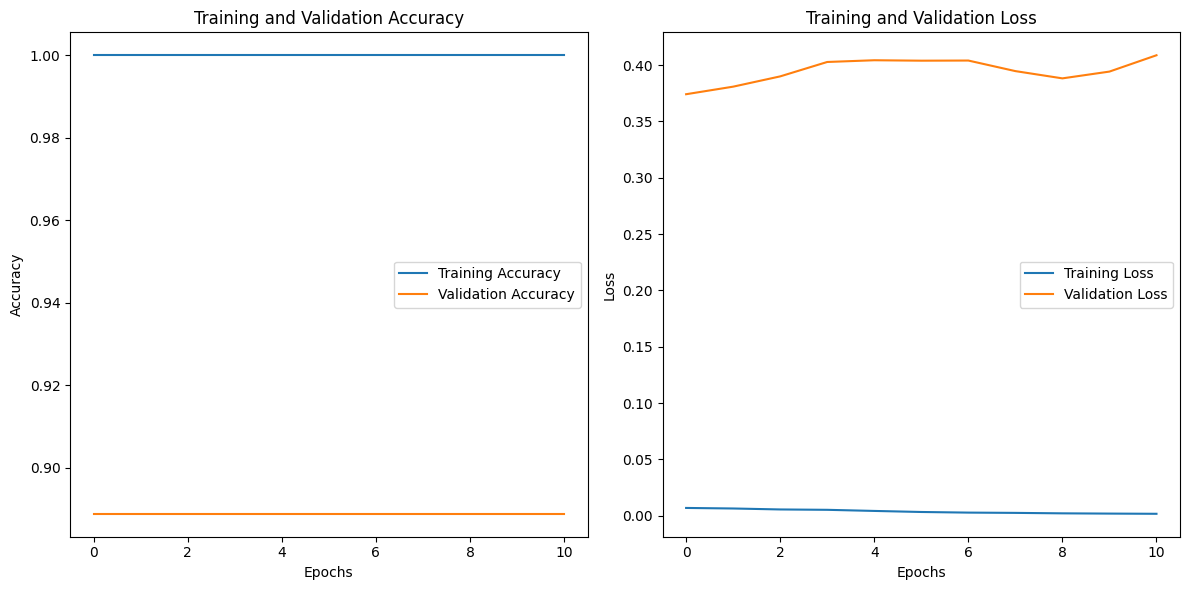

Model saved as 'Prince_Shrestha_model.h5'


In [10]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('Prince_Shrestha_model.h5')
print("Model saved as 'Prince_Shrestha_model.h5'")


## Task 1: Improved Model with Data Augmentation, Batch Normalization, and Dropout

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data used for validation
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 72 images belonging to 6 classes.
Found 18 images belonging to 6 classes.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical')

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Fit model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)


Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,822 (6.21 MB)

 Trainable params: 1,626,374 (6.20 MB)

 Non-trainable params: 448 (1.75 KB)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 947ms/step - accuracy: 0.1609 - loss: 2.6457 - val_accuracy: 0.2667 - val_loss: 1.6551
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 458ms/step - accuracy: 0.5210 - loss: 1.5834 - val_accuracy: 0.4000 - val_loss: 1.6030
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 483ms/step - accuracy: 0.4889 - loss: 1.3527 - val_accuracy: 0.3000 - val_loss: 1.6533
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 482ms/step - accuracy: 0.6316 - loss: 1.1222 - val_accuracy: 0.2444 - val_loss: 1.8505
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 579ms/step - accuracy: 0.6521 - loss: 1.0511 - val_accuracy: 0.2222 - val_loss: 1.9988
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 484ms/step - accuracy: 0.5796 - loss: 1.2385 - val_accuracy: 0.2222 - val_loss: 2.0488
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 619ms/step - accuracy: 0.6156 - loss: 1.0144 - val_accuracy: 0.1778 - val_loss: 2.2014
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 754ms/step - accuracy: 0.6690 - loss: 0.9752 - val_accuracy: 0.1556 - val_loss:

## Task 2: Transfer Learning using VGG16

In [13]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load base VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(6, activation='softmax')(x)

# Create model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

train_generator_vgg = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

val_generator_vgg = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Artificial Intelligent and Machine Learning/FruitinAmazon/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

# Train the model
history_vgg = model.fit(train_generator_vgg, epochs=5, validation_data=val_generator_vgg)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,246,150 (58.16 MB)

 Trainable params: 531,462 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Found 90 images belonging to 6 classes.
Found 90 images belonging to 6 classes.
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 99s 40s/step - accuracy: 0.1127 - loss: 1.9758 - val_accuracy: 0.3333 - val_loss: 1.7348
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 95s 39s/step - accuracy: 0.3402 - loss: 1.6989 - val_accuracy: 0.5333 - val_loss: 1.4566
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 102s 42s/step - accuracy: 0.5487 - loss: 1.4723 - val_accuracy: 0.6222 - val_loss: 1.3269
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 95s 39s/step - accuracy: 0.5350 - loss: 1.3978 - val_accuracy: 0.7111 - val_loss: 1.1692
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 96s 41s/step - accuracy: 0.6798 - loss: 1.1855 - val_accuracy: 0.6667 - val_loss: 1.0724


In [14]:
# Evaluate and Classification Report
import numpy as np
from sklearn.metrics import classification_report

# Predict and report
Y_pred = model.predict(val_generator_vgg)
y_pred = np.argmax(Y_pred, axis=1)
print("Classification Report:")
print(classification_report(val_generator_vgg.classes, y_pred, target_names=list(val_generator_vgg.class_indices.keys())))


3/3 ━━━━━━━━━━━━━━━━━━━━ 47s 15s/step
Classification Report:
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00        15
     cupuacu       0.08      0.07      0.07        15
    graviola       0.06      0.07      0.06        15
     guarana       0.12      0.20      0.15        15
     pupunha       0.67      0.13      0.22        15
      tucuma       0.17      0.27      0.21        15

    accuracy                           0.12        90
   macro avg       0.18      0.12      0.12        90
weighted avg       0.18      0.12      0.12        90

